In [1]:
!pip install tensorflow

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import itertools
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
# from wordcloud import WordCloud


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# path = "/content/drive/MyDrive/Colab Notebooks/malicious_phish.csv"
# df = pd.read_csv(path)
# print(df)

In [5]:
# df.type.value_counts()

In [6]:
df=pd.read_csv('malicious_phish.csv')

print(df.shape)
df.head()

(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [7]:
# Number of rows to drop
n = 400000
 
# Slicing last n rows
df = df[:-n]

In [8]:
df.isnull().values.any()

False

In [9]:
df_phish = df[df.type=='phishing']
df_malware = df[df.type=='malware']
df_deface = df[df.type=='defacement']
df_benign = df[df.type=='benign']

In [10]:
df.type.value_counts()

benign        183696
defacement     46460
phishing       15030
malware         6005
Name: type, dtype: int64

In [11]:
###Feature Engineering

In [12]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [13]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [14]:
#!pip install googlesearch-python
!pip install googlesearch-python

In [15]:
from googlesearch import search

def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [16]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))
df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.
0,br-icloud.com.br,phishing,0,0,1,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2


In [17]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

def count_atrate(url):
     
    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))


def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))


def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
    
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [18]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))

In [19]:
def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

def url_length(url):
    return len(str(url))


#Length of URL
df['url_length'] = df['url'].apply(lambda i: url_length(i))
#Hostname Length

def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

df.head()

def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


df['count-digits']= df['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['url'].apply(lambda i: letter_count(i))

df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,...,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,0,0,0,1,0,16,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,0,0,0,35,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,0,0,0,31,0,0,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,...,1,0,1,1,4,88,21,0,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,...,1,0,1,1,3,235,23,0,22,199


In [20]:
#!pip install tld
!pip install tld

In [21]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [22]:
df = df.drop("tld",1)

C:\Users\SAT\AppData\Local\Temp\ipykernel_8020\2551734815.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("tld",1)


In [23]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domian', 'short_url',
       'count-https', 'count-http', 'count%', 'count?', 'count-', 'count=',
       'url_length', 'hostname_length', 'sus_url', 'count-digits',
       'count-letters', 'fd_length', 'tld_length'],
      dtype='object')

In [24]:
df['type'].value_counts()

benign        183696
defacement     46460
phishing       15030
malware         6005
Name: type, dtype: int64

In [25]:
#### Target Encoding 

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

0    183696
1     46460
3     15030
2      6005
Name: type_code, dtype: int64

In [26]:
### Creation of Feature & Target

In [27]:
#Predictor Variables
# filtering out google_index as it has only 1 value
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

#Target Variable
y = df['type_code']

In [28]:
X.head()

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,...,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,0,0,2,0,0,0,0,0,0,0,...,0,1,0,16,0,0,0,-1,0,13
1,0,0,2,0,0,2,0,0,0,0,...,0,0,0,35,0,0,5,-1,1,29
2,0,0,2,0,0,3,0,0,0,0,...,0,0,0,31,0,0,7,-1,1,25
3,0,1,3,1,0,1,0,0,0,1,...,1,1,4,88,21,0,9,2,7,63
4,0,1,2,0,0,1,0,0,0,1,...,1,1,3,235,23,0,9,3,22,199


In [29]:
X.columns

Index(['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters'],
      dtype='object')

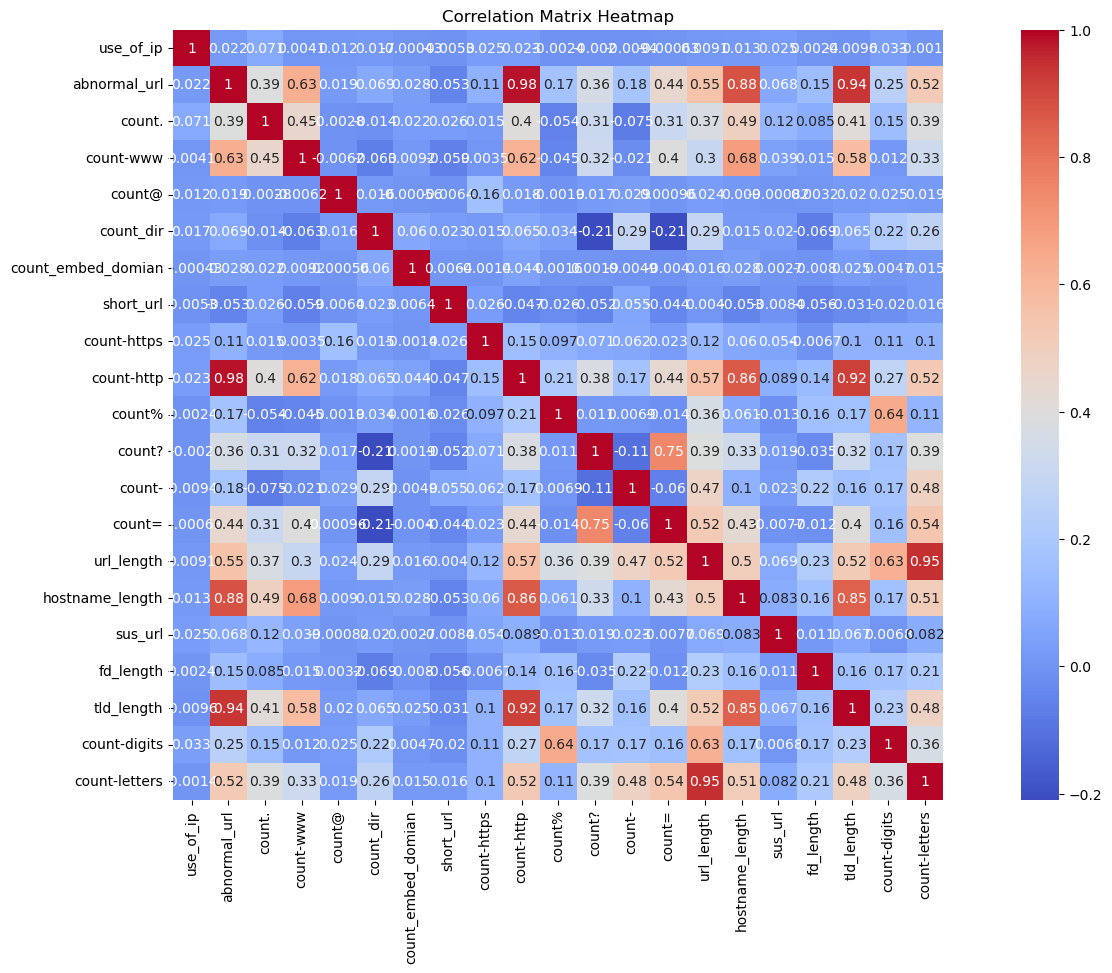

In [30]:
correlation_matrix = X.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

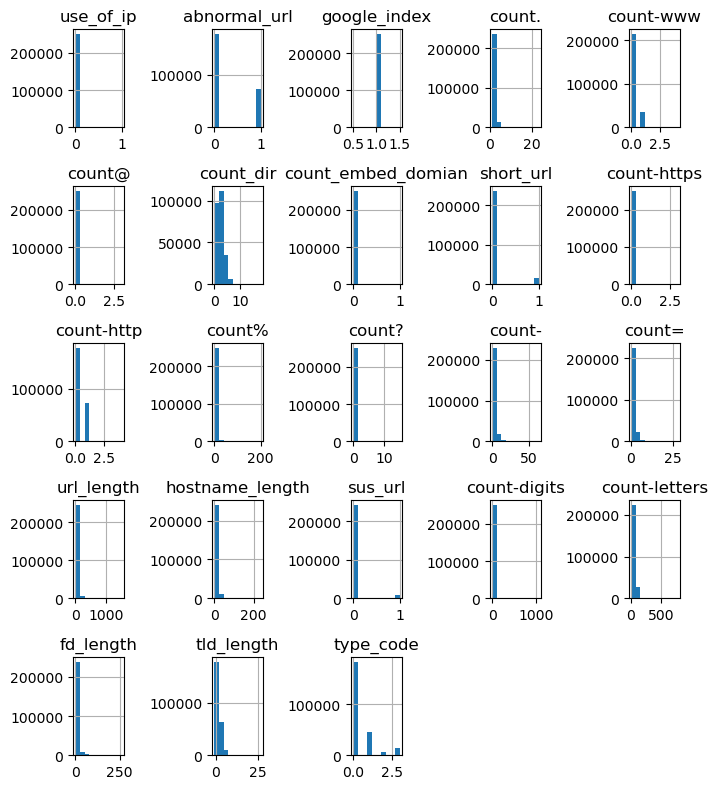

In [31]:
df.hist(figsize=(7, 8))
plt.tight_layout()
plt.show()

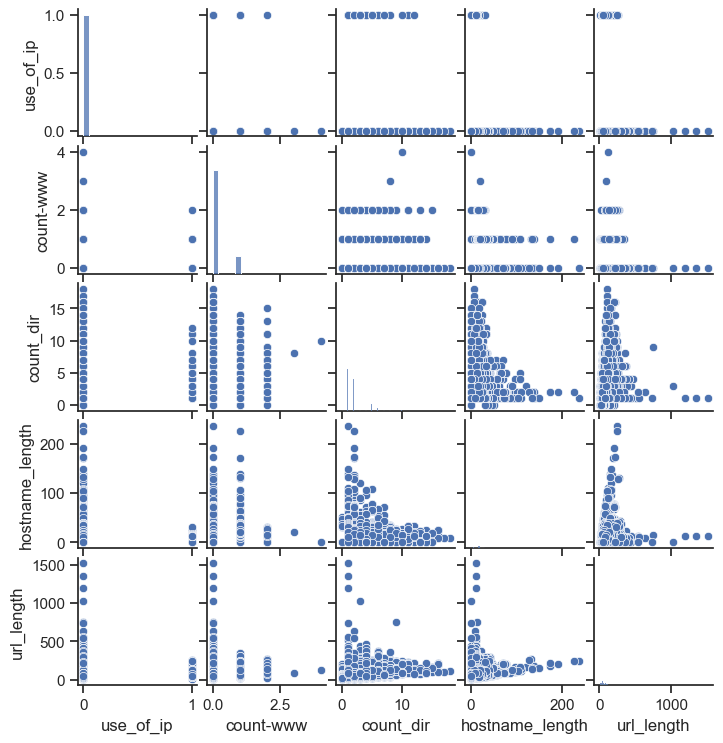

In [32]:
top_features = ['use_of_ip', 'count-www', 'count_dir', 'hostname_length', 'url_length']  

df_top = df[top_features]

sns.set(style='ticks')
sns.pairplot(df_top)
plt.subplots_adjust(top=0.9)  # Add some top padding
plt.gcf().set_size_inches(7, 8)  # Adjust the image size as desired

plt.show()

In [33]:
####   Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [34]:
#### 1. Random Forest Classifier  (learn the pattern ... ** rf.predict(X_test) **)

In [35]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
rf = RandomForestClassifier(n_estimators=100,max_features='sqrt')
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred_rf)
print("accuracy:   %0.3f" % score)

accuracy:   0.993


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36740
           1       0.98      1.00      0.99      9292
           2       0.98      0.88      0.93      1201
           3       0.96      0.94      0.95      3006

    accuracy                           0.99     50239
   macro avg       0.98      0.96      0.97     50239
weighted avg       0.99      0.99      0.99     50239



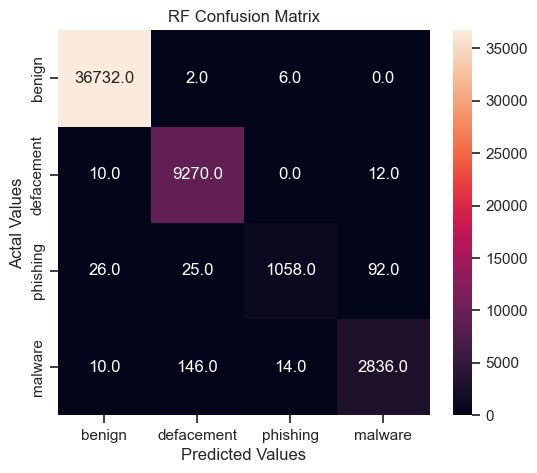

In [36]:
print(classification_report(y_test,y_pred_rf)) #,target_names=['benign', 'defacement','phishing','malware']
cm = confusion_matrix(y_test, y_pred_rf)

cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('RF Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

<Axes: >

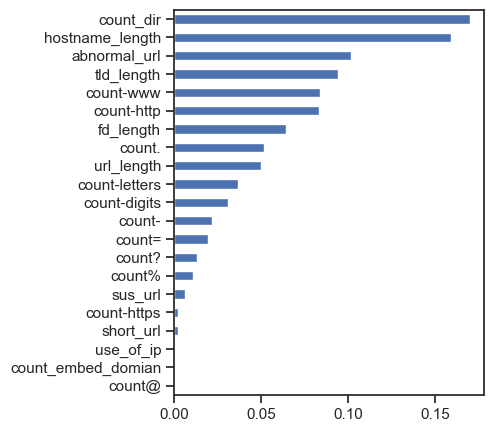

In [37]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(4, 5))

In [38]:
!pip install tensorflow scikeras scikit-learn

In [39]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
### Deep Neural Network for Ensambling

def getModel():
    Dnn = Sequential()
    Dnn.add(Dense(16, input_dim=21, activation='relu'))
    Dnn.add(Dense(32, activation='relu'))
    Dnn.add(Dense(16, activation='relu'))
    Dnn.add(Dense(8, activation='relu'))
    Dnn.add(Dense(4, activation='relu'))
    Dnn.add(Dense(1, activation='sigmoid'))
    Dnn.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return Dnn


param_grid = {
    'optimizer': ['adam', 'sgd'],      # Expand the options for optimizer
    'epochs': [50, 100, 150],          # Add more values for the number of epochs
    'batch_size': [32, 64, 128]        # Increase the range of batch sizes
}

Kmodel = KerasClassifier(model=getModel, epochs=50, batch_size=10, verbose=0)
grid = GridSearchCV(estimator=Kmodel, param_grid=param_grid, return_train_score=True)
grid_result = grid.fit(X_train, y_train)

In [41]:
# grid search epochs, batch size and optimizer
# optimizers = ['rmsprop', 'adam']
# epochs = [5]
# batches = [20]
# param_grid = dict(optimizer=optimizer, epochs=epochs, batch_size= batches)


In [42]:
grid_prid = grid_result.predict(X_test)
print("Accuracy", round(accuracy_score(y_test, grid_prid), 2))

Accuracy 0.73


[0.73129902 0.73129902 0.73129902 0.73129902 0.73129902 0.73129902
 0.73129902 0.73129902 0.73129902 0.73129902 0.73129902 0.73129902
 0.73129902 0.73129902 0.73129902 0.73129902 0.73129902 0.73129902]
[0.73129902 0.73129902 0.73129902 0.73129902 0.73129902 0.73129902
 0.73129902 0.73129902 0.73129902 0.73129902 0.73129902 0.73129902
 0.73129902 0.73129902 0.73129902 0.73129902 0.73129902 0.73129902]


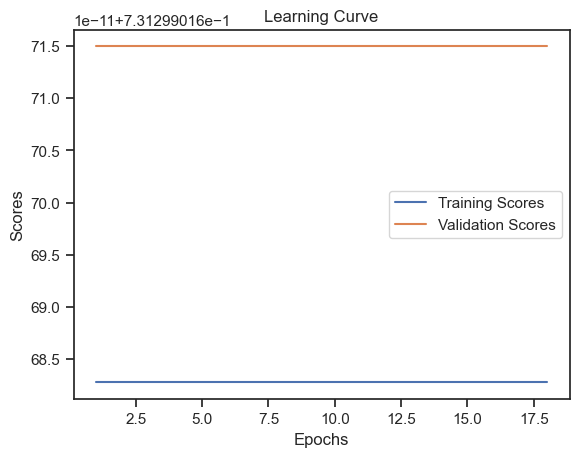

In [43]:
training_scores = grid_result.cv_results_['mean_train_score']
validation_scores = grid_result.cv_results_['mean_test_score']
print(training_scores);
print(validation_scores);
epochs = range(1, len(training_scores) + 1)

# Plot the learning curve
plt.plot(epochs, training_scores, label='Training Scores')
plt.plot(epochs, validation_scores, label='Validation Scores')
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.title('Learning Curve')
plt.legend()
plt.show()


              precision    recall  f1-score   support

      benign       0.73      1.00      0.84     36740
  defacement       0.00      0.00      0.00      9292
    phishing       0.00      0.00      0.00      1201
     malware       0.00      0.00      0.00      3006

    accuracy                           0.73     50239
   macro avg       0.18      0.25      0.21     50239
weighted avg       0.53      0.73      0.62     50239



C:\Users\SAT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


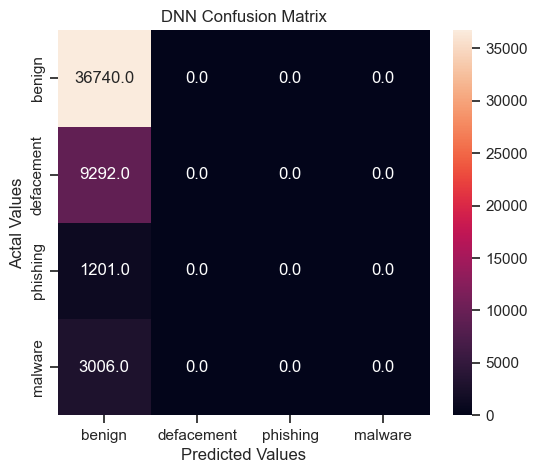

In [44]:
best_model = grid_result.best_estimator_

# Predict the target variable for the test set using the best model
y_pred1 = best_model.predict(X_test)

print(classification_report(y_test,y_pred1,target_names=['benign', 'defacement','phishing','malware']))

cm = confusion_matrix(y_test, y_pred1)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('DNN Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score


In [46]:
estimators = [('RF',rf),('DNN',grid)]

In [47]:
from sklearn.ensemble import VotingClassifier

In [48]:
ensemble  = VotingClassifier(estimators=estimators,weights=[1, 0],voting='hard')
x = cross_val_score(ensemble,X_train,y_train,cv=2,scoring='accuracy')
print(np.round(np.mean(x),2))

0.99


In [49]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('RF', RandomForestClassifier()),
                             ('DNN',
                              GridSearchCV(estimator=KerasClassifier(batch_size=10, epochs=50, model=<function getModel at 0x000001BE2EA264D0>, verbose=0),
                                           param_grid={'batch_size': [32, 64,
                                                                      128],
                                                       'epochs': [50, 100, 150],
                                                       'optimizer': ['adam',
                                                                     'sgd']},
                                           return_train_score=True))],
                 weights=[1, 0])

In [50]:
ens_pred = ensemble.predict(X_test)
print("Accuracy", round(accuracy_score(y_test, ens_pred), 2))

Accuracy 0.99


In [51]:
from joblib import dump

              precision    recall  f1-score   support

      benign       1.00      1.00      1.00     36740
  defacement       0.98      1.00      0.99      9292
    phishing       0.98      0.88      0.93      1201
     malware       0.97      0.94      0.95      3006

    accuracy                           0.99     50239
   macro avg       0.98      0.96      0.97     50239
weighted avg       0.99      0.99      0.99     50239



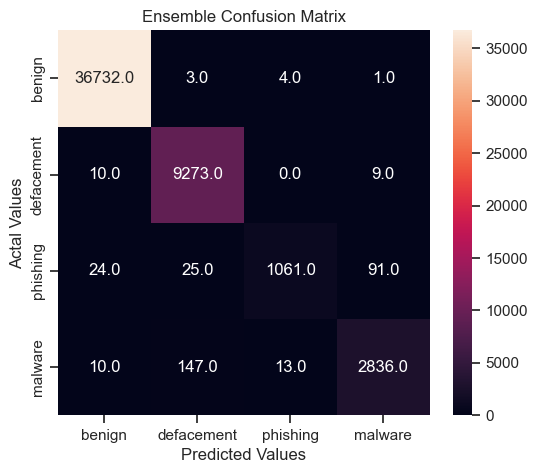

In [52]:
conf_mat = confusion_matrix(y_test, ens_pred)
print(classification_report(y_test,ens_pred,target_names=['benign', 'defacement','phishing','malware']))

cm_df = pd.DataFrame(conf_mat ,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Ensemble Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

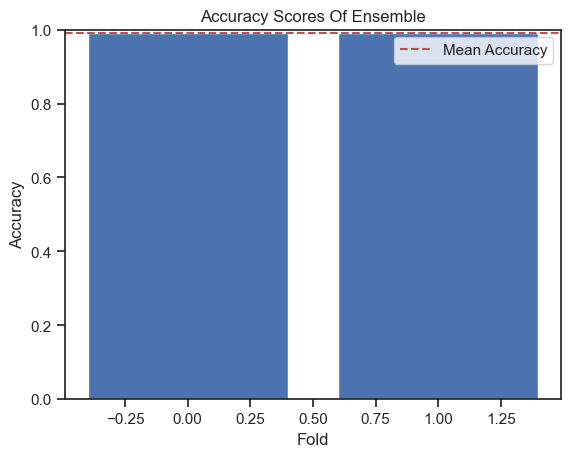

Mean Accuracy: 0.99


In [53]:
mean_accuracy = np.mean(x)
mean_accuracy_rounded = np.round(mean_accuracy, 2)

# Create a bar plot for the accuracy scores
plt.bar(range(len(x)), x)
plt.axhline(y=mean_accuracy, color='r', linestyle='--', label='Mean Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores Of Ensemble')
plt.legend()
plt.ylim(0, 1)  # Set the y-axis limits to ensure proper visualization
plt.show()

# Print the mean accuracy
print("Mean Accuracy:", mean_accuracy_rounded)

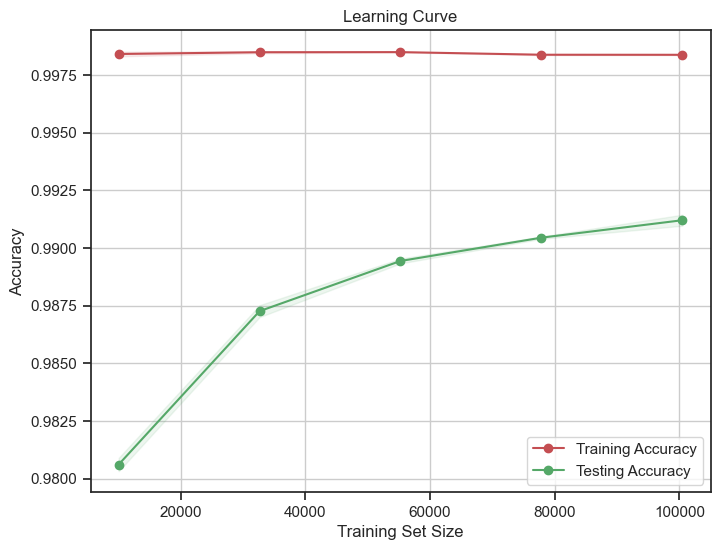

In [54]:
# Generate learning curve data
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(ensemble, X_train, y_train, cv=2, scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Testing Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [55]:
dump(ensemble, 'modelRFDNN.joblib');

INFO:tensorflow:Assets written to: C:\Users\SAT\AppData\Local\Temp\tmp0q4qxzp8\assets


INFO:tensorflow:Assets written to: C:\Users\SAT\AppData\Local\Temp\tmp0q4qxzp8\assets


INFO:tensorflow:Assets written to: C:\Users\SAT\AppData\Local\Temp\tmpz4rwfp96\assets


INFO:tensorflow:Assets written to: C:\Users\SAT\AppData\Local\Temp\tmpz4rwfp96\assets


In [56]:
### Prediction 
def main(url):
    status = []
    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))
    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))
    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))
    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)
    status.append(tld_length(tld))

    return status

In [57]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    # Due to updates to scikit-learn, we now need a 2D array as a parameter to the predict function.
    features_test = np.array(features_test).reshape((1, -1))

    pred = ensemble.predict(features_test)
    if int(pred[0]) == 0:
        
        res="SAFE"
        return res
    elif int(pred[0]) == 1.0:
        
        res="DEFACEMENT"
        return res
    elif int(pred[0]) == 2.0:
        res="PHISHING"
        return res
        
    elif int(pred[0]) == 3.0:
        
        res="MALWARE"
        return res

In [58]:
urls = ['titaniumcorporate.co.za','en.wikipedia.org/wiki/North_Dakota', 'www.google.com']
for url in urls:
     print(get_prediction_from_url(url))

C:\Users\SAT\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


MALWARE
SAFE
MALWARE


C:\Users\SAT\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\SAT\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
